In [ ]:
import pandas as pd
listing = pd.read_csv('/content/listings.csv')

Task 1

In [ ]:
#step1
listing.corr()

<ipython-input-8-2db0c0bb6285>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  listing.corr()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.527680,0.006060,-0.018406,0.030992,-0.041777,-0.308877,0.250475,0.038248,-0.059485
host_id,0.527680,1.000000,0.007230,-0.047042,0.037808,-0.028396,-0.148577,0.203368,-0.048570,-0.009365
latitude,0.006060,0.007230,1.000000,-0.107228,0.002181,0.011863,0.037973,0.042594,0.039785,0.012116
longitude,-0.018406,-0.047042,-0.107228,1.000000,-0.042662,-0.026450,-0.020905,-0.041718,-0.044122,-0.086532
price,0.030992,0.037808,0.002181,-0.042662,1.000000,0.003626,-0.001235,0.010060,0.073244,0.105959
minimum_nights,-0.041777,-0.028396,0.011863,-0.026450,0.003626,1.000000,-0.021685,-0.047410,0.027285,0.099350
number_of_reviews,-0.308877,-0.148577,0.037973,-0.020905,-0.001235,-0.021685,1.000000,0.556738,0.085898,0.277621
reviews_per_month,0.250475,0.203368,0.042594,-0.041718,0.010060,-0.047410,0.556738,1.000000,0.121327,0.232556
calculated_host_listings_count,0.038248,-0.048570,0.039785,-0.044122,0.073244,0.027285,0.085898,0.121327,1.000000,0.252414
availability_365,-0.059485,-0.009365,0.012116,-0.086532,0.105959,0.099350,0.277621,0.232556,0.252414,1.000000


In [ ]:
#step2
correlation = listing.corr()['number_of_reviews'].sort_values(ascending=False)
print(correlation)

number_of_reviews                 1.000000
reviews_per_month                 0.556738
availability_365                  0.277621
calculated_host_listings_count    0.085898
latitude                          0.037973
price                            -0.001235
longitude                        -0.020905
minimum_nights                   -0.021685
host_id                          -0.148577
id                               -0.308877
Name: number_of_reviews, dtype: float64


<ipython-input-9-5ffaaef0912c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = listing.corr()['number_of_reviews'].sort_values(ascending=False)


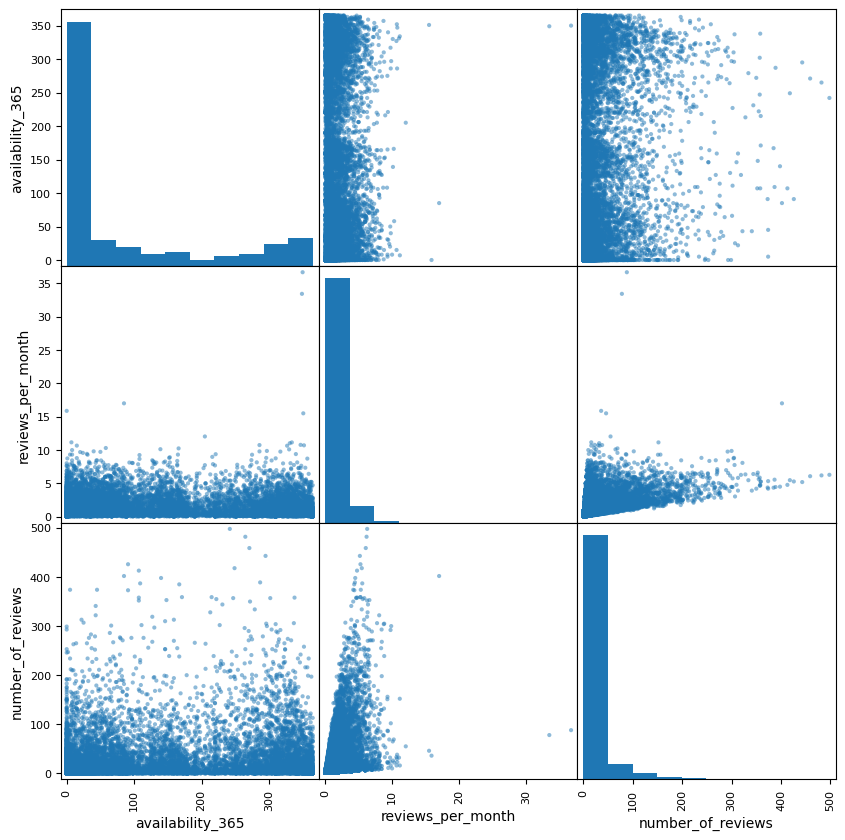

In [ ]:
#step3
import matplotlib.pyplot as plt
column_list = ["availability_365", "reviews_per_month", "number_of_reviews"]
pd.plotting.scatter_matrix(listing[column_list], figsize=(10, 10))
plt.show()

The graphs show that, the there is a poritive correlation between number_of_reviews and reviews_per_month, there is a negative correlation between number_of_reviews and availability_365, and finally review_per_month and availability_365 are not correlated.
Some listings have a high number of reviews and are popular, while others have a low number of reviews and are less popular.
The majority of listings have a moderate number of reviews and a corresponding moderate number of reviews per month.
Listings with more reviews generally have lower availability.

The pearson correlation seeks to verify in detail, the relationship between between each fiels

Task2

In [15]:
#step1
listing.isnull().sum()

id                                   0
name                                59
host_id                              0
host_name                           26
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3908
reviews_per_month                 3914
calculated_host_listings_count       0
availability_365                     0
dtype: int64

Step 2
Attributes with null values include: "name", "host_name", "last_review", and "reviews_per_month"

In [17]:
print(listing['reviews_per_month'].fillna(listing['reviews_per_month'].mean(), inplace=True))

None


In [20]:
#step 3
column_to_fill = 'reviews_per_month'
column_average = listing[column_to_fill].mean()
listing[column_to_fill].fillna(column_average, inplace=True)

In [21]:
listing.isnull().sum()

id                                   0
name                                59
host_id                              0
host_name                           26
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3908
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

The dataset had 22,552 rows and 16 columns. It contained a mix of string, float, boolean, and datetime data types. It stores multiple data tyes

For continuous analysis, all data must be checked for any nulls and these nulls removed. Also, strong positive correlations should be addressed.